<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/epacuit/introduction-machine-learning/blob/main/regression/example-predicting-house-prices.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(predicting-housing-prices)=
# Example: Predicting House Prices


In this section, we will attempt to predict the median price of homes in a given Boston suburb in the mid-1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on. 

See [https://fairlearn.org/v0.12/user_guide/datasets/boston_housing_data.html](https://fairlearn.org/v0.12/user_guide/datasets/boston_housing_data.html) for more information about this dataset, especially some important concerns about the fairness of the dataset. 



In [1]:
from tensorflow.keras.datasets import boston_housing 

(train_data, train_targets), (test_data, test_targets) = ( boston_housing.load_data())

In [2]:
print("Training data shape:", train_data.shape)
print("Training targets shape:", train_targets.shape)
print("Testing data shape:", test_data.shape)   
print("Testing targets shape:", test_targets.shape)

Training data shape: (404, 13)
Training targets shape: (404,)
Testing data shape: (102, 13)
Testing targets shape: (102,)


In [3]:
print(train_data[0])
print(train_targets[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [4]:
import pandas as pd
# Load the dataset
(train_data, train_targets), _ = boston_housing.load_data()

# Feature names (Boston Housing dataset)
feature_names = [
    'CRIM',    # Crime rate per capita
    'ZN',      # Residential zoning
    'INDUS',   # Industrial areas proportion
    'CHAS',    # Charles River adjacency
    'NOX',     # Nitric oxides concentration
    'RM',      # Average rooms per dwelling
    'AGE',     # Units built before 1940
    'DIS',     # Distance to employment centers
    'RAD',     # Accessibility to highways
    'TAX',     # Property-tax rate
    'PTRATIO', # Pupil-teacher ratio
    'B',       # Proportion of Black residents
    'LSTAT'    # Lower socio-economic status (%)
]

# Convert data into a DataFrame
df_train_data = pd.DataFrame(train_data, columns=feature_names)

# Display the first 5 rows
print(df_train_data.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0  1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
1  0.02177  82.5   2.03   0.0  0.415  7.610   15.7  6.2700   2.0  348.0   
2  4.89822   0.0  18.10   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
3  0.03961   0.0   5.19   0.0  0.515  6.037   34.5  5.9853   5.0  224.0   
4  3.69311   0.0  18.10   0.0  0.713  6.376   88.4  2.5671  24.0  666.0   

   PTRATIO       B  LSTAT  
0     21.0  396.90  18.72  
1     14.7  395.38   3.11  
2     20.2  375.52   3.26  
3     20.2  396.90   8.01  
4     20.2  391.43  14.65  


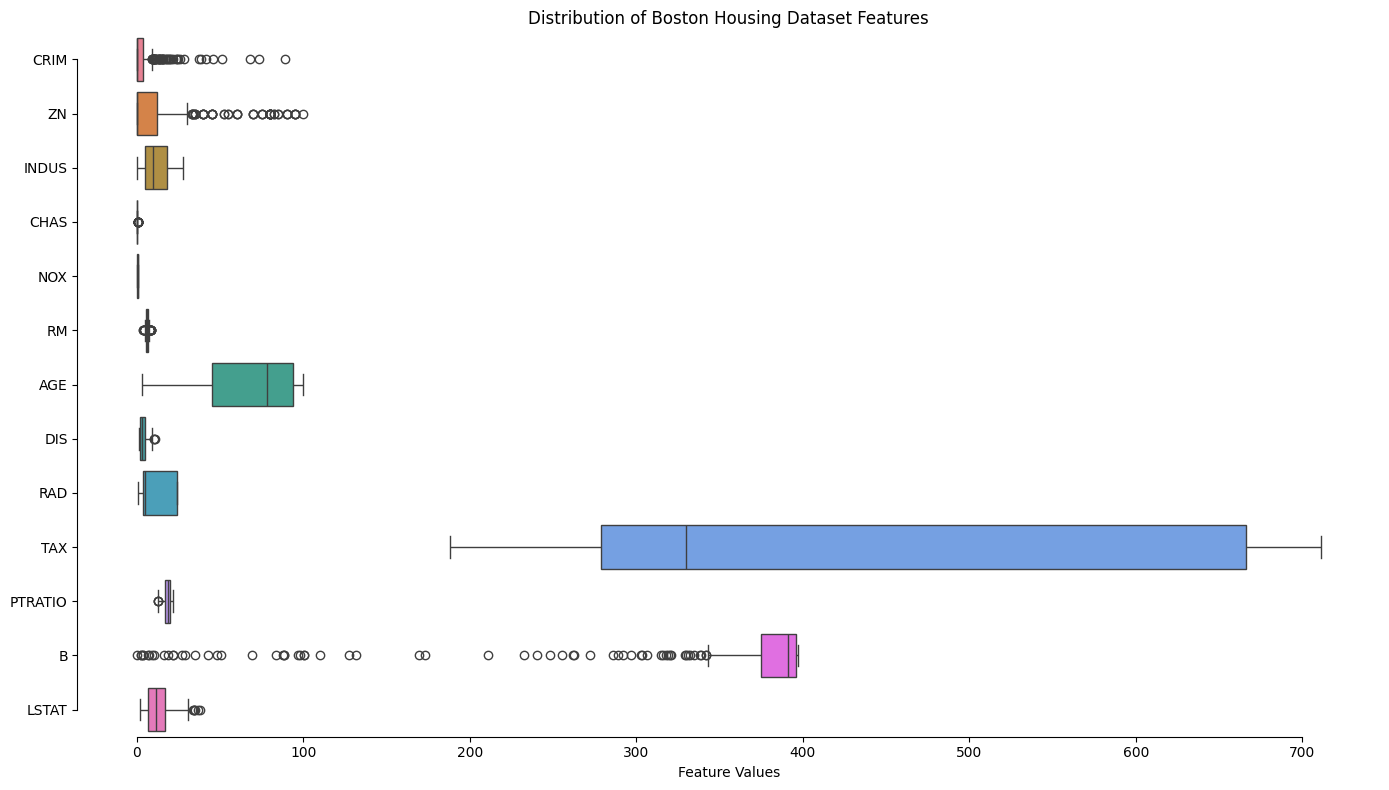

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set up figure size
plt.figure(figsize=(14, 8))

# Generate boxplots
sns.boxplot(data=df_train_data, orient='h')

# Plot details
plt.title('Distribution of Boston Housing Dataset Features')
plt.xlabel('Feature Values')
sns.despine(trim=True)
plt.tight_layout()
plt.show()


## Prepare the Data

In [6]:
norm_train_data = train_data.copy()
norm_test_data = test_data.copy()
mean = norm_train_data.mean(axis=0)
print("Mean:", mean)
norm_train_data -= mean 
std = norm_train_data.std(axis=0)
print("Standard deviation:", std)
norm_train_data /= std 
norm_test_data -= mean 
norm_test_data /= std

Mean: [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
Standard deviation: [9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


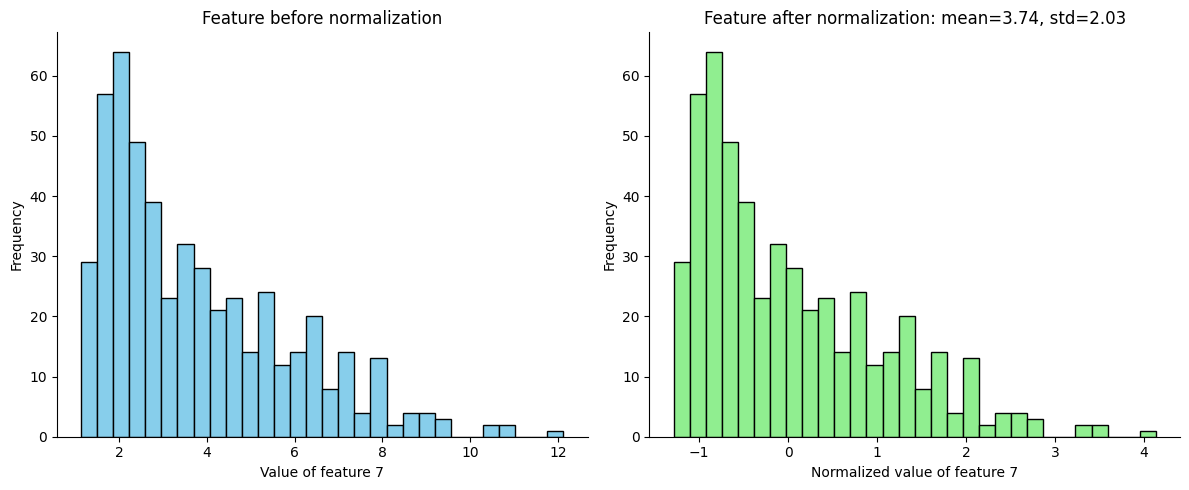

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Load the dataset
(train_data, _), (test_data, _) = boston_housing.load_data()

# Combine train and test data for visualization purposes only (not for training)
data = np.concatenate([train_data, test_data], axis=0)

# Visualize one feature before normalization (e.g., feature 5 - average number of rooms)
feature_idx = 7

plt.figure(figsize=(12, 5))

# Before normalization
plt.subplot(1, 2, 1)
plt.hist(data[:, feature_idx], bins=30, color='skyblue', edgecolor='black')
plt.title('Feature before normalization')
plt.xlabel(f'Value of feature {feature_idx}')
plt.ylabel('Frequency')

# Compute mean and std from training data only
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

# Normalize data
data_norm = (data - mean) / std

# After normalization
plt.subplot(1, 2, 2)
plt.hist(data_norm[:, feature_idx], bins=30, color='lightgreen', edgecolor='black')
plt.title(f'Feature after normalization: mean={mean[feature_idx]:.2f}, std={std[feature_idx]:.2f}')
plt.xlabel(f'Normalized value of feature {feature_idx}')
plt.ylabel('Frequency')
sns.despine()
plt.tight_layout()
plt.show()

In [8]:
norm_mean = norm_train_data.mean(axis=0)
norm_std = norm_train_data.std(axis=0)
for i in range(0, 13):
    print("Feature", i)
    print("Original:   ", f"mean={mean[i]:.3f},  std={std[i]:.3f}")    
    print("Normalized: ", f"mean={norm_mean[i]:.3f},  std={norm_std[i]:.3f}")    
    print()

Feature 0
Original:    mean=3.745,  std=9.229
Normalized:  mean=-0.000,  std=1.000

Feature 1
Original:    mean=11.480,  std=23.738
Normalized:  mean=0.000,  std=1.000

Feature 2
Original:    mean=11.104,  std=6.803
Normalized:  mean=0.000,  std=1.000

Feature 3
Original:    mean=0.062,  std=0.241
Normalized:  mean=-0.000,  std=1.000

Feature 4
Original:    mean=0.557,  std=0.117
Normalized:  mean=-0.000,  std=1.000

Feature 5
Original:    mean=6.267,  std=0.709
Normalized:  mean=0.000,  std=1.000

Feature 6
Original:    mean=69.011,  std=27.906
Normalized:  mean=0.000,  std=1.000

Feature 7
Original:    mean=3.740,  std=2.028
Normalized:  mean=0.000,  std=1.000

Feature 8
Original:    mean=9.441,  std=8.688
Normalized:  mean=0.000,  std=1.000

Feature 9
Original:    mean=405.899,  std=166.169
Normalized:  mean=-0.000,  std=1.000

Feature 10
Original:    mean=18.476,  std=2.198
Normalized:  mean=0.000,  std=1.000

Feature 11
Original:    mean=354.783,  std=93.995
Normalized:  mean=0.00

## Building the Model

In [9]:
from tensorflow import keras
from tensorflow.keras.layers import Dense

def build_model():
    model = keras.Sequential([
        Dense(64, activation="relu"),
        Dense(64, activation="relu"),
        Dense(1)])

    model.compile(
        optimizer="rmsprop", 
        loss="mse", 
        metrics=["mae"])

    return model

### Mean Absolute Error (MAE) vs. Mean Squared Error (MSE)

The **Mean Absolute Error (MAE)** and **Mean Squared Error (MSE)** both measure prediction errors but differ significantly in how they handle those errors: Suppose that $\hat{y}$ are the predicted values and $y$ are the actual values.

- **Mean Absolute Error (MAE)** measures the *average absolute difference*:

$$
\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}\left|y_i - \hat{y}_i\right|
$$

- **Mean Squared Error (MSE)** measures the *average squared difference*:

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$


### When to use MAE or MSE?

#### Use MAE when:
- You want a metric that's easy to interpret ("On average, predictions are off by $x$ units").
- You prefer robustness against outliers (large, rare errors don’t disproportionately affect results).
- You need stable behavior regardless of occasional large errors.

#### Use MSE when:
- You specifically want to penalize large errors heavily.
- Large prediction errors carry significant consequences, and small errors matter less.
- Your optimization method benefits from smoother, more sensitive loss functions.


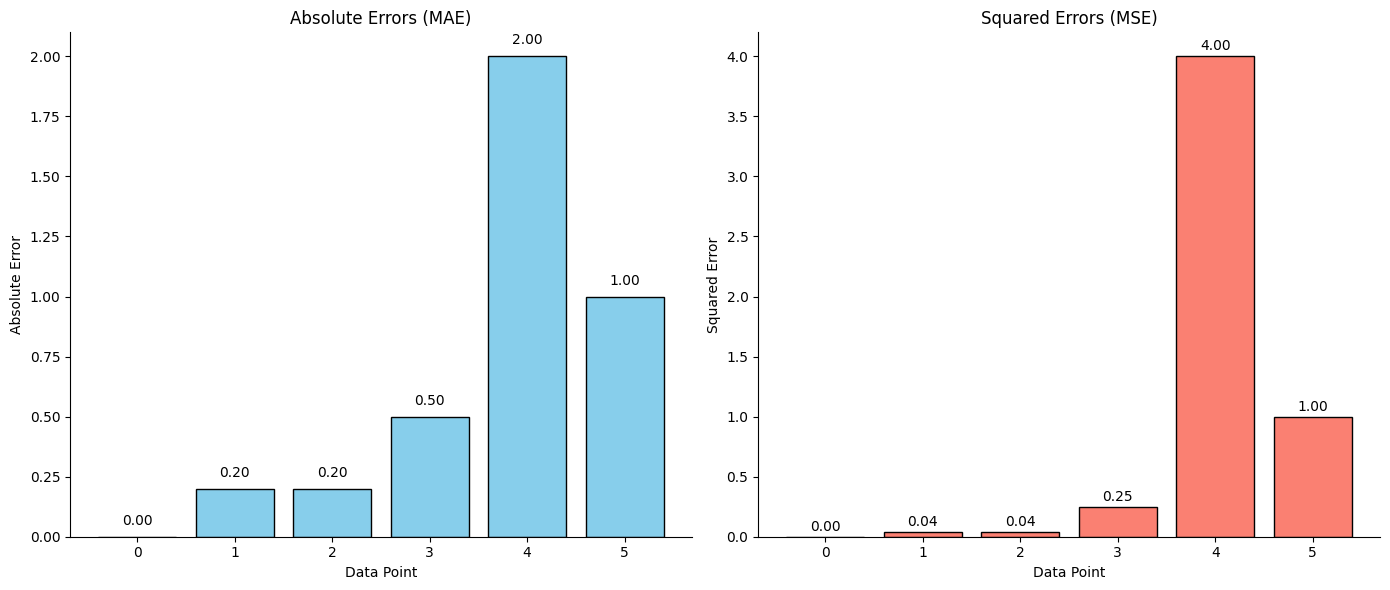

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sample actual and predicted values
actual = np.array([0, 1, 2, 3, 4, 5])
predicted = np.array([0, 1.2, 1.8, 3.5, 2.0, 6])

# Calculate absolute errors and squared errors
absolute_errors = np.abs(actual - predicted)
squared_errors = (actual - predicted)**2

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# MAE visualization
axes[0].bar(range(len(actual)), absolute_errors, color='skyblue', edgecolor='black')
axes[0].set_title('Absolute Errors (MAE)')
axes[0].set_xlabel('Data Point')
axes[0].set_ylabel('Absolute Error')

# MSE visualization
axes[1].bar(range(len(actual)), squared_errors, color='salmon', edgecolor='black')
axes[1].set_title('Squared Errors (MSE)')
axes[1].set_xlabel('Data Point')
axes[1].set_ylabel('Squared Error')

# Add actual error values on top of bars for clarity
for i in range(len(actual)):
    axes[0].text(i, absolute_errors[i]+0.05, f"{absolute_errors[i]:.2f}", ha='center')
    axes[1].text(i, squared_errors[i]+0.05, f"{squared_errors[i]:.2f}", ha='center')

plt.tight_layout()
sns.despine()
plt.show()


## K-Fold Cross Validation




**K-Fold Cross-Validation** is a robust method to evaluate the performance of machine learning models. The main idea is to repeatedly split the dataset into training and validation subsets in different ways. 

This process helps ensure that the model is not just memorizing the training data but is genuinely learning to generalize to unseen data.

### How K-Fold Cross-Validation Works
1. **Split the Data:**  
   The dataset is divided into `k` equally sized folds (subsets).
2. **Training and Validation:**
   For each fold:
   - The model is trained on `k-1` folds (the training set).
   - The remaining fold is used for validation (the test set).
3. **Repeat:**
   This process is repeated `k` times, with each fold being used as the validation set once.
4. **Average the Results:**
   The performance metric (e.g., accuracy, MAE, MSE) is averaged across all `k` iterations to provide a more reliable estimate of the model's performance.

### Reasons to Use K-Fold Cross-Validation

- **Better Estimate of Model Performance:**  
  It provides a more reliable estimate by averaging results across multiple splits, reducing variability caused by a single random train-test split.

- **Efficient Use of Data:**  
  Each data point is used exactly once for validation, ensuring that the entire dataset contributes to the evaluation of the model’s performance.

- **Reduces Overfitting and Bias:**  
  It helps detect whether the model generalizes well to unseen data, avoiding overly optimistic (biased) estimates of accuracy.

- **Tuning and Comparing Models:**  
  Facilitates comparison of different models or hyperparameters, giving you confidence in selecting the best model for your task.

In short, **K-Fold Cross-Validation** enhances the trustworthiness and stability of your model evaluation results.


In [11]:
k = 4 # number of folds

sample_train_data = np.random.uniform(size=(10, 3))
sample_target_data = np.random.randint(0, 45,size=(10,))
print("Sample train data shape:", sample_train_data.shape)
print(sample_train_data)
print("Sample train target shape:", sample_target_data.shape)
print(sample_target_data)

print()
num_val_samples = len(sample_train_data) // k
print("Number of validation samples:", num_val_samples)

i = 0 # the current fold

val_data = sample_train_data[i * num_val_samples: (i + 1) * num_val_samples] 
print("Fold: ", i)
print("data: \n",val_data.shape)
print(val_data)
val_targets = sample_target_data[i * num_val_samples: (i + 1) * num_val_samples] 
print("targets: \n", val_targets.shape)
print(val_targets)

partial_train_data = np.concatenate(
    [sample_train_data[:i * num_val_samples], 
        sample_train_data[(i + 1) * num_val_samples:]], axis=0) 
partial_train_targets = np.concatenate(
    [sample_target_data[:i * num_val_samples], 
        sample_target_data[(i + 1) * num_val_samples:]], axis=0) 
print("Partial train data shape:", partial_train_data.shape)
print(partial_train_data)
print("Partial train targets shape:", partial_train_targets.shape)
print(partial_train_targets)
print("\n------\n")

i = 1 # the current fold

val_data = sample_train_data[i * num_val_samples: (i + 1) * num_val_samples] 
print("Fold: ", i)
print("data: \n",val_data.shape)
print(val_data)
val_targets = sample_target_data[i * num_val_samples: (i + 1) * num_val_samples] 
print("targets: \n", val_targets.shape)
print(val_targets)

partial_train_data = np.concatenate(
    [sample_train_data[:i * num_val_samples], 
        sample_train_data[(i + 1) * num_val_samples:]], axis=0) 
partial_train_targets = np.concatenate(
    [sample_target_data[:i * num_val_samples], 
        sample_target_data[(i + 1) * num_val_samples:]], axis=0) 
print("Partial train data shape:", partial_train_data.shape)
print(partial_train_data)
print("Partial train targets shape:", partial_train_targets.shape)
print(partial_train_targets)
print("\n------\n")

i = 2 # the current fold

val_data = sample_train_data[i * num_val_samples: (i + 1) * num_val_samples] 
print("Fold: ", i)
print("data: \n",val_data.shape)
print(val_data)
val_targets = sample_target_data[i * num_val_samples: (i + 1) * num_val_samples] 
print("targets: \n", val_targets.shape)
print(val_targets)

partial_train_data = np.concatenate(
    [sample_train_data[:i * num_val_samples], 
        sample_train_data[(i + 1) * num_val_samples:]], axis=0) 
partial_train_targets = np.concatenate(
    [sample_target_data[:i * num_val_samples], 
        sample_target_data[(i + 1) * num_val_samples:]], axis=0) 
print("Partial train data shape:", partial_train_data.shape)
print(partial_train_data)
print("Partial train targets shape:", partial_train_targets.shape)
print(partial_train_targets)
print("\n------\n")


i = 3 # the current fold

val_data = sample_train_data[i * num_val_samples: (i + 1) * num_val_samples] 
print("Fold: ", i)
print("data: \n",val_data.shape)
print(val_data)
val_targets = sample_target_data[i * num_val_samples: (i + 1) * num_val_samples] 
print("targets: \n", val_targets.shape)
print(val_targets)

partial_train_data = np.concatenate(
    [sample_train_data[:i * num_val_samples], 
        sample_train_data[(i + 1) * num_val_samples:]], axis=0) 
partial_train_targets = np.concatenate(
    [sample_target_data[:i * num_val_samples], 
        sample_target_data[(i + 1) * num_val_samples:]], axis=0) 
print("Partial train data shape:", partial_train_data.shape)
print(partial_train_data)
print("Partial train targets shape:", partial_train_targets.shape)
print(partial_train_targets)
print("\n------\n")



Sample train data shape: (10, 3)
[[0.83269301 0.14766977 0.18709705]
 [0.94573454 0.50348924 0.84575466]
 [0.73174125 0.77417122 0.29438399]
 [0.10744429 0.35168403 0.32390108]
 [0.75518357 0.95903709 0.57256711]
 [0.45510925 0.80867589 0.70671782]
 [0.67052181 0.50251523 0.59573753]
 [0.18583408 0.2725009  0.30690587]
 [0.83524182 0.49104895 0.25246754]
 [0.737663   0.75666924 0.68469601]]
Sample train target shape: (10,)
[32  1 40  8 24 31 18 38 17  8]

Number of validation samples: 2
Fold:  0
data: 
 (2, 3)
[[0.83269301 0.14766977 0.18709705]
 [0.94573454 0.50348924 0.84575466]]
targets: 
 (2,)
[32  1]
Partial train data shape: (8, 3)
[[0.73174125 0.77417122 0.29438399]
 [0.10744429 0.35168403 0.32390108]
 [0.75518357 0.95903709 0.57256711]
 [0.45510925 0.80867589 0.70671782]
 [0.67052181 0.50251523 0.59573753]
 [0.18583408 0.2725009  0.30690587]
 [0.83524182 0.49104895 0.25246754]
 [0.737663   0.75666924 0.68469601]]
Partial train targets shape: (8,)
[40  8 24 31 18 38 17  8]

----

In [12]:
k = 4
num_val_samples = len(norm_train_data) // k 
num_epochs = 100  
all_scores = []

for i in range(k):  
    print(f"Processing fold #{i}") 
    val_data = norm_train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples] 

    partial_train_data = np.concatenate(
        [norm_train_data[:i * num_val_samples], 
         norm_train_data[(i + 1) * num_val_samples:]], axis=0) 
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], 
         train_targets[(i + 1) * num_val_samples:]], axis=0) 
    
    model = build_model() 
    model.fit(partial_train_data, 
              partial_train_targets, 
              epochs=num_epochs, 
              batch_size=16, 
              verbose=0)

    val_mse, val_mae = model.evaluate(
        val_data, 
        val_targets, 
        verbose=0) 
    
    all_scores.append(val_mae)

Processing fold #0


2025-04-15 08:35:40.571604: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2025-04-15 08:35:40.571624: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2025-04-15 08:35:40.571628: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
I0000 00:00:1744720540.571641 17882356 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1744720540.571660 17882356 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2025-04-15 08:35:40.824558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


Processing fold #2


KeyboardInterrupt: 

In [13]:
print(all_scores)
print(np.mean(all_scores))

[2.2549641132354736, 2.488332986831665, 2.610654830932617, 2.52333402633667]
2.4693214893341064


In [14]:
k = 4
num_val_samples = len(norm_train_data) // k 
num_epochs = 500  
all_mae_histories = []
for i in range(k):  
    print(f"Processing fold #{i}") 
    val_data = norm_train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples] 

    partial_train_data = np.concatenate(
        [norm_train_data[:i * num_val_samples], 
         norm_train_data[(i + 1) * num_val_samples:]], axis=0) 
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], 
         train_targets[(i + 1) * num_val_samples:]], axis=0) 
    
    model = build_model() 
    history = model.fit(
        partial_train_data, 
        partial_train_targets, 
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=16, verbose=0)

    mae_history = history.history["val_mae"]

    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [15]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) 
                       for i in range(num_epochs)]

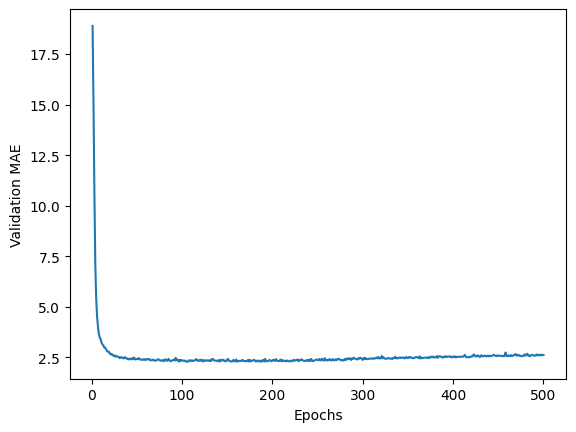

In [16]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history) 
plt.xlabel("Epochs") 
plt.ylabel("Validation MAE") 
plt.show()

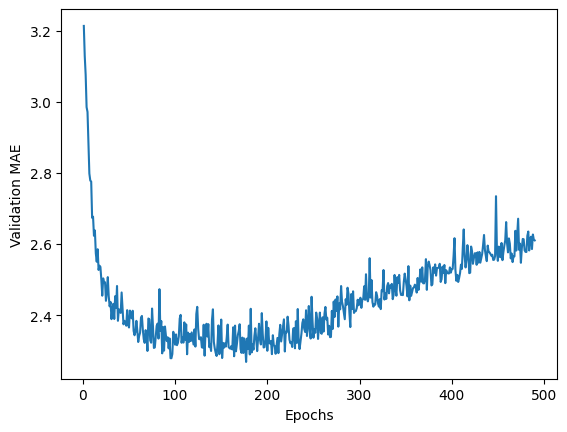

In [17]:
truncated_mae_history = average_mae_history[10:]

plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history) 
plt.xlabel("Epochs") 
plt.ylabel("Validation MAE") 
plt.show()

In [18]:
model = build_model() 

model.fit(
    train_data, 
    train_targets, 
    epochs=130, 
    batch_size=16, 
    verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(test_mae_score)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.7568 - mae: 4.4139 
4.623236656188965


In [20]:
predictions = model.predict(test_data)

test_idx = 40
print(test_data[test_idx])
print(predictions[test_idx])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[1.9510e-02 1.7500e+01 1.3800e+00 0.0000e+00 4.1610e-01 7.1040e+00
 5.9500e+01 9.2229e+00 3.0000e+00 2.1600e+02 1.8600e+01 3.9324e+02
 8.0500e+00]
[22.461094]


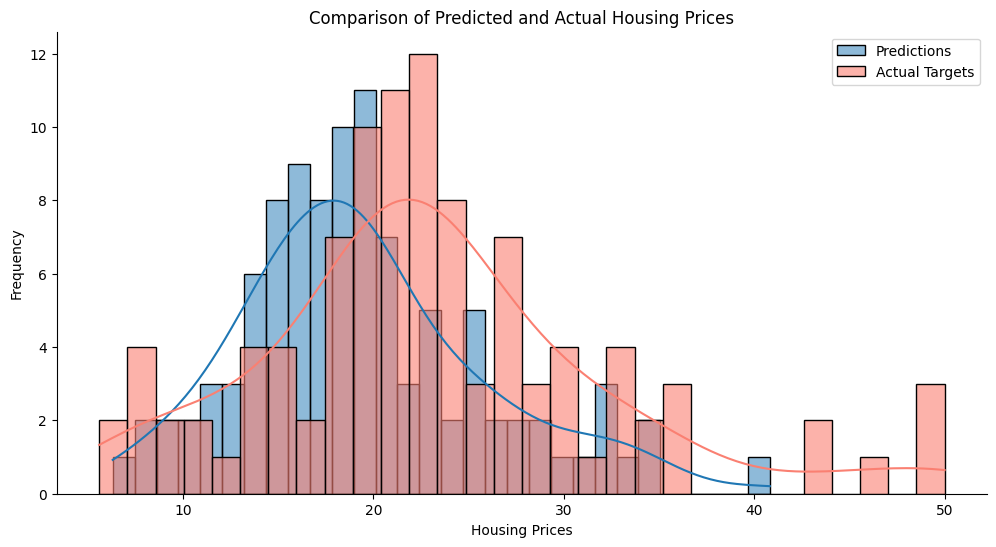

In [21]:
# plot the histogram of the predictions

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot predictions
sns.histplot(predictions, bins=30, color='skyblue', edgecolor='black', label='Predictions', kde=True)

# Plot actual targets
sns.histplot(test_targets, bins=30, color='salmon', edgecolor='black', alpha=0.6, label='Actual Targets', kde=True)

plt.xlabel('Housing Prices')
plt.ylabel('Frequency')
plt.title('Comparison of Predicted and Actual Housing Prices')
plt.legend()
sns.despine()
plt.show()
